In [1]:
from pint import UnitRegistry

In [2]:
units = UnitRegistry()

In [3]:
meter = units.meter
seconds = units.seconds

In [5]:
a = 9.8 * meter/seconds**2
t = 3.4*seconds

In [6]:
v = a*t

In [7]:
v

33.32 <Unit('meter / second')>

In [8]:
from numpy import pi
pi

3.141592653589793

In [9]:
import numpy as np
np.sin(pi/4)**2 +np.cos(pi/4)**2

1.0

In [10]:
h = 1*meter

In [12]:
foot = units.foot

In [15]:
1* foot + h

4.2808398950131235 <Unit('foot')>

In [16]:
a+t

DimensionalityError: Cannot convert from 'meter / second ** 2' ([length] / [time] ** 2) to 'second' ([time])

In [133]:
from modsim import State,flip,TimeSeries,decorate,source_code

In [130]:
bikeshare = State(olin = 10,wellesley = 2)

In [131]:
bikeshare.olin,bikeshare.wellesley

(10, 2)

In [97]:
#from olin to wellesley
def bike_to_wellesly():
    print("Moving bike to Wellesley")
    if bikeshare.olin:
        bikeshare.olin -= 1
        bikeshare.wellesley +=1
    else:
        pass
    
    
def bike_to_olin():
    print("Moving bike to olin")
    if bikeshare.wellesley:
        bikeshare.olin += 1
        bikeshare.wellesley -=1
    else:
        pass

In [118]:
bike_to_wellesly()

Moving bike to Wellesley


In [119]:
bikeshare

,values
olin,0
wellesley,12


In [125]:
def step(p1,p2):
    if flip(p1):
        bike_to_wellesly()

    if flip(p2):
        bike_to_olin()


In [58]:
step()

Moving bike to Wellesley
Moving bike to olin


In [87]:
# for recoring outputs in a timeseries
results = TimeSeries()

In [88]:
#run a simulation
for time in range(10):
    print(time)
    step(0.6,0.5)
    results[time+1] = bikeshare.olin

0
1
2
Moving bike to Wellesley
3
4
Moving bike to Wellesley
Moving bike to olin
5
Moving bike to Wellesley
6
Moving bike to Wellesley
7
Moving bike to Wellesley
8
Moving bike to olin
9
Moving bike to Wellesley


In [89]:
results

,values
1,-2
2,-2
3,-3
4,-3
5,-3
6,-4
7,-5
8,-6
9,-5
10,-6


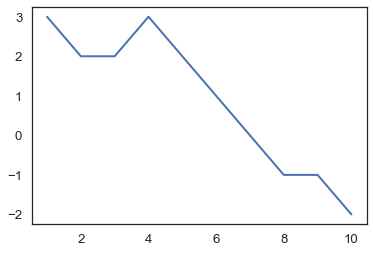

In [86]:
results.plot()

In [128]:
def run_simulation(p1,p2,num_steps):
    results = TimeSeries()
    for step_ in range(num_steps):
        step(p1,p2)
        results[step_+1] = bikeshare.olin
        
    results.plot()
    decorate(title ='bike',
             xlabel='Time Step(min)',
             ylabel='num of bikes'
    )
    

Moving bike to Wellesley
Moving bike to olin
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to olin
Moving bike to Wellesley
Moving bike to olin
Moving bike to olin
Moving bike to Wellesley
Moving bike to olin
Moving bike to olin
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to Wellesley
Moving bike to olin
Moving bike to olin
Moving bike to olin
Moving bike to Wellesley
Moving bike to olin
Moving bike to Wellesley


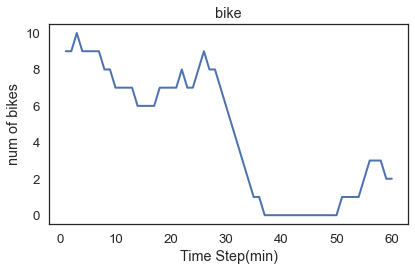

In [132]:
run_simulation(0.3,0.2,60)

In [134]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p

